In [196]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import seaborn as sns
import scipy
%matplotlib inline

In [212]:
data = pd.read_csv("../../../Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv")
data.Date = pd.to_datetime(data.Date)
data['Hour'] = pd.to_datetime(data.Time).dt.hour
data['DayOfWeek'] = data.Date.dt.dayofweek
data['Minutes'] = pd.to_datetime(data.Time).dt.minute

In [213]:
data.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,Hour,Minutes
0,110308742,MISSING PERSON,FOUND PERSON,4,2011-04-15,16:00,TARAVAL,LOCATED,0 Block of CRESPI DR,-122.476328,37.719687,POINT (-122.476327815126 37.7196874952717),11030874275000,16,0
1,90316914,WARRANTS,WARRANT ARREST,3,2009-03-26,12:28,SOUTHERN,"ARREST, BOOKED",1000 Block of MARKET ST,-122.411340,37.781271,POINT (-122.411339562557 37.7812707434494),9031691463010,12,28
2,130132311,SECONDARY CODES,DOMESTIC VIOLENCE,4,2013-02-15,02:00,PARK,"ARREST, BOOKED",CASTRO ST / MARKET ST,-122.435188,37.762670,POINT (-122.435187699349 37.7626702770872),13013231115200,2,0
3,80052833,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",1,2008-01-15,20:13,MISSION,"ARREST, CITED",VALENCIA ST / 16TH ST,-122.421886,37.764918,POINT (-122.421886357981 37.7649178909424),8005283365016,20,13
4,70535770,SECONDARY CODES,DOMESTIC VIOLENCE,5,2007-05-26,18:10,MISSION,"ARREST, BOOKED",2800 Block of FOLSOM ST,-122.413935,37.751693,POINT (-122.413935404044 37.7516932889916),7053577015200,18,10


#### Let's make a jitter-plot (that is, code up something like Figure 2-1 from DAOST from scratch), but based on SF Police data. My hunch from inspecting the file is that the police-folks might be a little bit lazy in noting down the exact time down to the second. So choose a crime-type and a suitable time interval (somewhere between a month and 6 months depending on the crime-type) and create a jitter plot of the arrest times during a single hour (like 13-14, for example). So let time run on the x-axis and create vertical jitter.

In [169]:
data.Category.unique()

array(['MISSING PERSON', 'WARRANTS', 'SECONDARY CODES', 'OTHER OFFENSES',
       'LARCENY/THEFT', 'FORGERY/COUNTERFEITING', 'ASSAULT',
       'DRUG/NARCOTIC', 'NON-CRIMINAL', 'BURGLARY', 'VANDALISM',
       'DRUNKENNESS', 'ROBBERY', 'VEHICLE THEFT', 'KIDNAPPING', 'FRAUD',
       'PROSTITUTION', 'DISORDERLY CONDUCT', 'STOLEN PROPERTY',
       'RECOVERED VEHICLE', 'LIQUOR LAWS', 'WEAPON LAWS',
       'SUSPICIOUS OCC', 'TRESPASS', 'EMBEZZLEMENT', 'RUNAWAY',
       'DRIVING UNDER THE INFLUENCE', 'SEX OFFENSES, FORCIBLE',
       'BAD CHECKS', 'SEX OFFENSES, NON FORCIBLE', 'SUICIDE',
       'FAMILY OFFENSES', 'ARSON', 'LOITERING', 'GAMBLING', 'BRIBERY',
       'EXTORTION', 'PORNOGRAPHY/OBSCENE MAT', 'TREA'], dtype=object)

In [170]:
crime = "PROSTITUTION"
year = 2011
initial_month = 1
final_month = 6

hour = 1
prostitution_data = data[(data.Hour==hour) & (data.Date.dt.year==year) \
     & (data.Category==crime) & (data.Date.dt.month >= initial_month)\
    & (data.Date.dt.month <= final_month)]
len(prostitution_data)

121

In [171]:
mu, sigma = 1, 0.001 # mean and standard deviation
x_shift = np.random.normal(mu, sigma, len(prostitution_data))

In [172]:
mu, sigma = 0, 0.01 # mean and standard deviation
y_shift = np.random.normal(mu, sigma, len(prostitution_data))

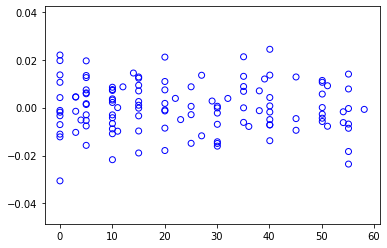

In [173]:
plt.scatter(prostitution_data.Minutes * x_shift[0], y_shift, marker='o', facecolors='none', edgecolors='b')

#### This time, pick two crime-types with different geographical patterns and a suitable time-interval for each (you want between 1000 and 10000 points in your histogram). Then take the latitude part of the GPS coordinates for each crime and bin the latitudes so that you have around 50 bins across the city of SF. You can use your favorite method for binning. I like numpy.histogram. This function gives you the counts and then you do your own plotting.

Text(0.5, 1.0, 'DRUNKENNESS')

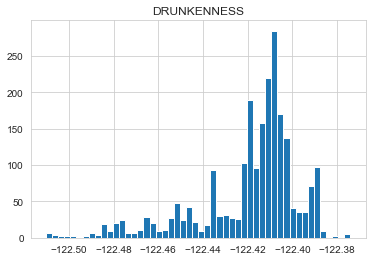

In [181]:
crime1 = "DRUNKENNESS"
crime2 = "ROBBERY"
year_start = 2011
year_end = 2013
initial_month = 1
final_month = 12

drunkenness_data = data[(data.Date.dt.year>=year_start) & (data.Date.dt.year<=year_end) \
     & (data.Category==crime1) & (data.Date.dt.month >= initial_month)\
    & (data.Date.dt.month <= final_month)]
plt.hist(drunkenness_data.X, bins=50)
plt.title(crime1)

In [175]:
bi

array([-122.51022575, -122.50750162, -122.50477749, -122.50205336,
       -122.49932924, -122.49660511, -122.49388098, -122.49115685,
       -122.48843272, -122.48570859, -122.48298447, -122.48026034,
       -122.47753621, -122.47481208, -122.47208795, -122.46936382,
       -122.4666397 , -122.46391557, -122.46119144, -122.45846731,
       -122.45574318, -122.45301905, -122.45029493, -122.4475708 ,
       -122.44484667, -122.44212254, -122.43939841, -122.43667428,
       -122.43395016, -122.43122603, -122.4285019 , -122.42577777,
       -122.42305364, -122.42032951, -122.41760539, -122.41488126,
       -122.41215713, -122.409433  , -122.40670887, -122.40398474,
       -122.40126062, -122.39853649, -122.39581236, -122.39308823,
       -122.3903641 , -122.38763997, -122.38491585, -122.38219172,
       -122.37946759, -122.37674346, -122.37401933])

Text(0.5, 1.0, 'ROBBERY')

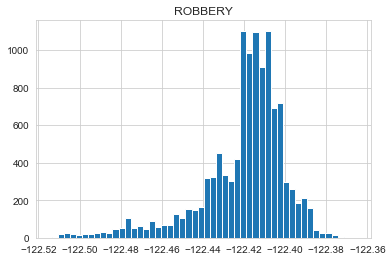

In [206]:
robbery_data = data[(data.Date.dt.year>=year_start) & (data.Date.dt.year<=year_end) \
     & (data.Category==crime2) & (data.Date.dt.month >= initial_month)\
    & (data.Date.dt.month <= final_month)]
plt.hist(robbery_data.X, bins=50)
plt.title(crime2)

#### Create the kernel density plot for the prostitution data, you can either use gaussian_kde from scipy.stats or you can use seaborn.kdeplot

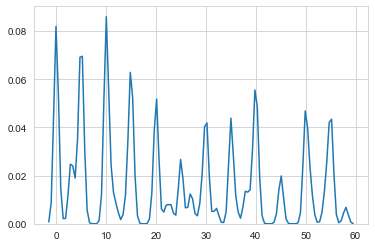

In [179]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(prostitution_data.Minutes), bw=0.5)

#### Now grab 25 random timepoints from the dataset (of 1000-10000 original data) you've just plotted and create a version of Figure 2-4 based on the 25 data points. Does this shed light on why I think KDEs can bee misleading?

In [193]:
drunkenness_random = random.choices(drunkenness_data.X.values, k = 25)

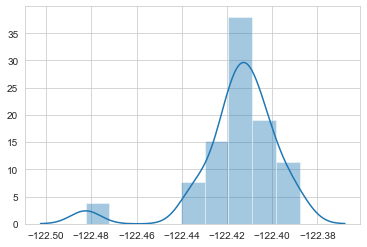

In [194]:
sns.set_style('whitegrid')
sns.distplot(drunkenness_random)

#### Now we'll work on creating two versions of the plot in Figure 2-11, but using the GPS data you used for your version of Figure 2-2. Comment on the result. It is not easy to create this plot from scracth, Hint: Take a look at the scipy.stats.probplot function.

((array([-3.84559276, -3.62237187, -3.49991058, ...,  3.49991058,
          3.62237187,  3.84559276]),
  array([-122.51364206, -122.51102472, -122.51048135, ..., -122.37257153,
         -122.37071254, -122.36556543])),
 (0.01987211300862743, -122.42040029534185, 0.9440625920297896))

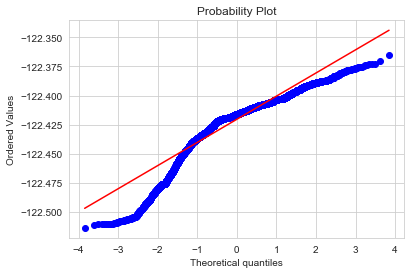

In [209]:
scipy.stats.probplot(robbery_data.X, plot=plt)

### Box Plots

#### For the full time-span of the data, calulate the number of crimes per day within each category for the entire duration of the data. Create a box-and whiskers plot showing the mean, median, quantiles, etc for all 15 crime-types side-by-side. There are many ways to do this. I like to use matplotlibs's built in functionality

In [236]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

In [216]:
crime_category_per_day = data.groupby(["Category", "Date"]).count().IncidntNum

Text(0.5, 1.0, 'Crimes per day')

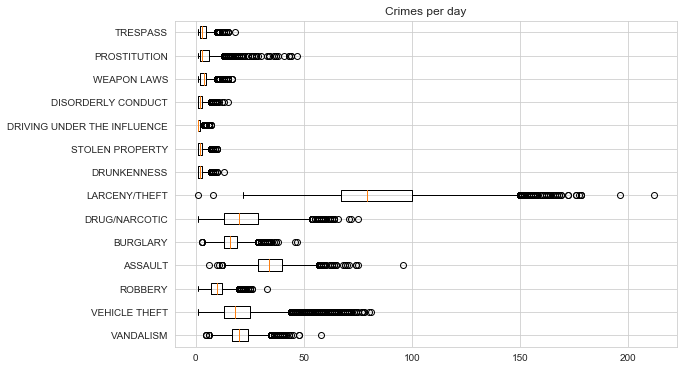

In [258]:
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)

ax.boxplot([crime_category_per_day[cat] for cat in focuscrimes], vert=False)
ax.set_yticklabels(focuscrimes)
ax.set_title("Crimes per day")

#### What does this plot reveal that you can't see in the plots from last time?

Some crimes have indeed days in which the number of crime was high but the 75% of the days are condensed around the same low value. Some crimes are more consistant in the number of daily crime (the ones at the top of the boxplot chart) and the rest have a wider distribution

In [259]:
data['SecondsFromMidnight'] = data.Minutes * 60 + data.Hour * 60*60

Text(0.5, 1.0, 'Crimes per day')

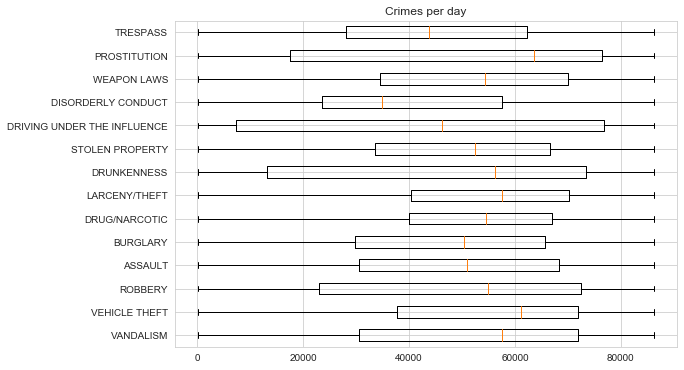

In [268]:
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)

ax.boxplot([data[data.Category == cat].SecondsFromMidnight for cat in focuscrimes], vert=False)
ax.set_yticklabels(focuscrimes)
ax.set_title("Crimes per day")